# AlexNet
LeNet 在小数据集上取得了很好的成果，但是在当时在更大的数据集上训练卷积神经网络的性能和可行性还有待研究，事实上，在之前神经网络往往被其它机器学习算法超越，如SVM

AlexNet在2012年ImageNet挑战赛中取得了轰动一时的成绩，有趣的是，在网络的最底层，魔性学习到了一些类似于传统滤波器的特征抽取器。AlexNet的更高层建立在这些底层表示的基础上，以表示更大的特征，如眼睛鼻子等，更高的层可以检测整个物体，如人、飞机、狗等。最终的隐藏神经元可以学习图像的综合表示，从而使属于不同类别的数据易于区分


-------

1. AlexNet 与 LeNet相似，但使用了更多的卷积层和更多的参数来提取特征
2. 今天AlexNet被更好地架构超越了，但是它是从浅层网络到深层网络的关键一步
3. 尽管AlexNet的代码比LeNet只多了几行，但是学术界花了很多年才接受深度学习这一概念，并应用其出色的实验结果，这也是由于缺乏有效的计算工具
4. 暂退法，ReLU激活函数和预处理是提升计算机视觉任务性能的其它关键步骤

In [1]:
# 实现AlexNet模型
import torch as t
from torch.nn import Dropout,Flatten,Conv2d,MaxPool2d,Linear,Sequential,ReLU

net =Sequential(
    Conv2d(1,96,kernel_size=11,stride=4,padding=1),
    ReLU(),
    MaxPool2d(kernel_size=3,stride=2),
    Conv2d(96,256,kernel_size=5,padding=2),
    ReLU(),
    MaxPool2d(kernel_size=3,stride=2),
    Conv2d(256,384,kernel_size=3,padding=1),
    ReLU(),
    Conv2d(384,384,kernel_size=3,padding=1),
    ReLU(),
    Conv2d(384,256,kernel_size=3,padding=1),
    ReLU(),
    MaxPool2d(kernel_size=3,stride=2),
    Flatten(),
    Linear(6400,4096),
    ReLU(),
    Dropout(0.5),
    Linear(4096, 4096),
    ReLU(),
    Dropout(0.5),
    Linear(4096,10),
)

In [2]:
X = t.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

loss 0.329, train acc 0.881, test acc 0.880
1719.5 examples/sec on cuda:0


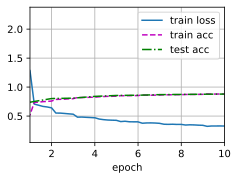

In [3]:
import sys
sys.path.append("../")
from pltutils import *
batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)
lr, num_epochs = 0.01, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, try_gpu())
